In [124]:
import matplotlib as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the CSV files
df = pd.read_csv('spotify_df_after_eda_7.2.25.csv')  # Loading the CSV file
df1 = pd.read_csv('spotify_df1_after_eda_7.2.25.csv')  # Loading the CSV file

# Load the Pickle files
df = pd.read_pickle('spotify_df_after_eda_7.2.25.pkl')  # Loading the Pickle file
df1 = pd.read_pickle('spotify_df1_after_eda_7.2.25.pkl')  # Loading the Pickle file

# Print confirmation
print("Spotify dataset loaded from CSV and Pickle files.")


Spotify dataset loaded from CSV and Pickle files.


In [125]:
df.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,danceability,energy,key,loudness,mode,...,duration_ms,month_track_album_release_date,genre_edm,genre_rap,genre_pop,genre_r&b,genre_latin,genre_rock,release_date_category,top_50_words_in_song
12529,00qoe7ojrl0bpyiciwezb2,foreigner,67,2pw51hagvwpta3ayl2wvuu,37i9dqzf1dxdoeft9zx0dh,0.357,0.653,9,-5.554,1,...,259800,1,0,0,0,0,0,1,1960-1993,0
20572,01qhvhvkgqzo861kl3ghfx,trinere,27,5bc8h7zzduifrb8pjj4utm,1oreeujywpqv2ox68bvppa,0.720,0.814,8,-8.195,0,...,324360,1,0,0,0,0,1,0,1994-2007,0
24300,01gsilj7mznurr7gwajrgt,shinehead,32,3pcdxm6bp0nrofqdykznwp,0dminkymnnotwvefamsnzb,0.819,0.497,0,-15.495,0,...,264893,1,0,0,0,1,0,0,1960-1993,1
14108,01q4ccxbvplcwz1fpifaem,smiths,56,7jfexk2w5adi25njkn0ugg,7rpsfdtqizyit4pvzq4c0c,0.680,0.626,7,-8.519,1,...,122760,1,0,0,0,0,0,1,1960-1993,1
6865,02gwpancasvl82yc7y2hmn,petey pablo,54,5hrshdifyk7qxstjkb0sjz,4lcywqdozpfcbzrcbi3fow,0.735,0.844,1,-5.215,1,...,286427,1,0,1,0,0,0,0,1994-2007,0


In [126]:
df1.head()

,track_name,track_album_name,playlist_name,playlist_subgenre
12529,juke box hero,4 expanded,classic rock drive,classic rock
20572,ill youll need,night,80s freestyledisco dance party set crossfade 4...,latin hip hop
24300,try love,sidewalk university,90s new jack swing,new jack swing
14108,girlfriend coma 2011 remaster,strangeways come,permanent wave,permanent wave
6865,raise,diary sinner 1st entry,southern hip hop,southern hip hop


In [127]:
# WORD CLOUD

In [128]:
#creating a word cloud using costumers reviews

In [129]:
import nltk
from wordcloud import WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [130]:
#loading the text_df
text=df1['track_name'].astype('string')
text

12529                    juke box hero
20572                   ill youll need
24300                         try love
14108    girlfriend coma 2011 remaster
6865                             raise
                     ...              
1699                      pretty girls
8332                     heart hustler
14082              space age love song
11615              time fall amy grant
18035                  fruta prohibida
Name: track_name, Length: 1656, dtype: string

In [131]:
text.info()

<class 'pandas.core.series.Series'>
Index: 1656 entries, 12529 to 18035
Series name: track_name
Non-Null Count  Dtype 
--------------  ----- 
1656 non-null   string
dtypes: string(1)
memory usage: 25.9 KB


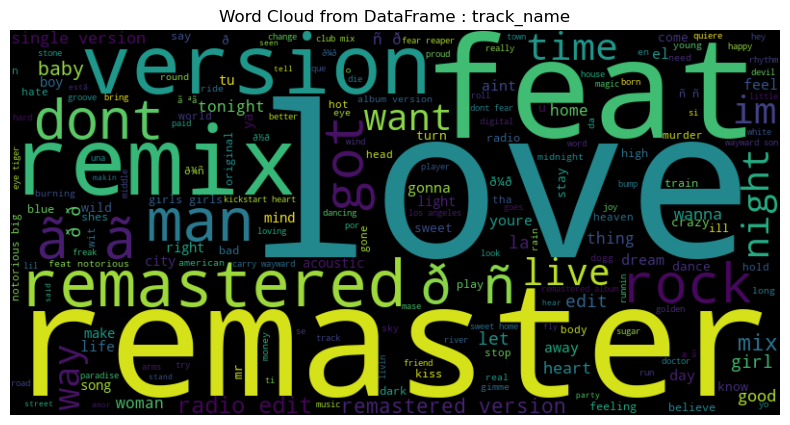

In [132]:
#creating the word cloud
text_data = text.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame : track_name")
plt.show()

In [133]:
import pandas as pd
import re
from collections import Counter

# Ensure that the column exists before proceeding
if 'track_name' in df1.columns:
    # Load the 'track_name' column from df1
    text = df1['track_name'].astype('string')

    # Concatenate all the track names into one large string
    text_data = text.str.cat(sep=' ')

    # Tokenize the text to get individual words
    words = re.findall(r'\w+', text_data.lower())  # Extract words and convert to lowercase

    # Count the frequency of each word
    word_counts = Counter(words)

    # Get the top 5 most common words
    common_words = word_counts.most_common(5)

    # Create a list of the top 5 most common words
    top_5_words = [word for word, _ in common_words]

    # Create a new column 'top_5_words_in_song' in df
    df['top_5_words_in_song'] = df1['track_name'].apply(
        lambda x: 1 if any(word in x.lower() for word in top_5_words) else 0
    )

else:
    print("The 'track_name' column does not exist in df1. Please check the column name.")


In [134]:
df.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,danceability,energy,key,loudness,mode,...,month_track_album_release_date,genre_edm,genre_rap,genre_pop,genre_r&b,genre_latin,genre_rock,release_date_category,top_50_words_in_song,top_5_words_in_song
12529,00qoe7ojrl0bpyiciwezb2,foreigner,67,2pw51hagvwpta3ayl2wvuu,37i9dqzf1dxdoeft9zx0dh,0.357,0.653,9,-5.554,1,...,1,0,0,0,0,0,1,1960-1993,0,0
20572,01qhvhvkgqzo861kl3ghfx,trinere,27,5bc8h7zzduifrb8pjj4utm,1oreeujywpqv2ox68bvppa,0.720,0.814,8,-8.195,0,...,1,0,0,0,0,1,0,1994-2007,0,0
24300,01gsilj7mznurr7gwajrgt,shinehead,32,3pcdxm6bp0nrofqdykznwp,0dminkymnnotwvefamsnzb,0.819,0.497,0,-15.495,0,...,1,0,0,0,1,0,0,1960-1993,1,1
14108,01q4ccxbvplcwz1fpifaem,smiths,56,7jfexk2w5adi25njkn0ugg,7rpsfdtqizyit4pvzq4c0c,0.680,0.626,7,-8.519,1,...,1,0,0,0,0,0,1,1960-1993,1,1
6865,02gwpancasvl82yc7y2hmn,petey pablo,54,5hrshdifyk7qxstjkb0sjz,4lcywqdozpfcbzrcbi3fow,0.735,0.844,1,-5.215,1,...,1,0,1,0,0,0,0,1994-2007,0,0


In [135]:
df.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,danceability,energy,key,loudness,mode,...,month_track_album_release_date,genre_edm,genre_rap,genre_pop,genre_r&b,genre_latin,genre_rock,release_date_category,top_50_words_in_song,top_5_words_in_song
12529,00qoe7ojrl0bpyiciwezb2,foreigner,67,2pw51hagvwpta3ayl2wvuu,37i9dqzf1dxdoeft9zx0dh,0.357,0.653,9,-5.554,1,...,1,0,0,0,0,0,1,1960-1993,0,0
20572,01qhvhvkgqzo861kl3ghfx,trinere,27,5bc8h7zzduifrb8pjj4utm,1oreeujywpqv2ox68bvppa,0.720,0.814,8,-8.195,0,...,1,0,0,0,0,1,0,1994-2007,0,0
24300,01gsilj7mznurr7gwajrgt,shinehead,32,3pcdxm6bp0nrofqdykznwp,0dminkymnnotwvefamsnzb,0.819,0.497,0,-15.495,0,...,1,0,0,0,1,0,0,1960-1993,1,1
14108,01q4ccxbvplcwz1fpifaem,smiths,56,7jfexk2w5adi25njkn0ugg,7rpsfdtqizyit4pvzq4c0c,0.680,0.626,7,-8.519,1,...,1,0,0,0,0,0,1,1960-1993,1,1
6865,02gwpancasvl82yc7y2hmn,petey pablo,54,5hrshdifyk7qxstjkb0sjz,4lcywqdozpfcbzrcbi3fow,0.735,0.844,1,-5.215,1,...,1,0,1,0,0,0,0,1994-2007,0,0


In [136]:
#loading the text_df
text=df['track_artist'].astype('string')
text

12529           foreigner
20572             trinere
24300           shinehead
14108              smiths
6865          petey pablo
               ...       
1699                  fun
8332              fat pat
14082      flock seagulls
11615        peter cetera
18035    dragon caballero
Name: track_artist, Length: 1656, dtype: string

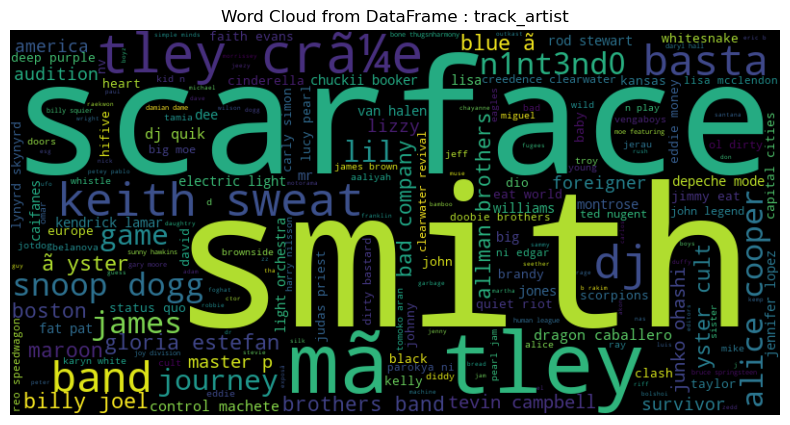

In [137]:
#creating the word cloud
text_data = text.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame : track_artist")
plt.show()

Top 5 common words in track_artist: ['smith', 'scarface', 'mã tley', 'tley crã¼e', 'dj']
      track_artist  Top 5 words in artist
12529    foreigner                      0
20572      trinere                      0
24300    shinehead                      0
14108       smiths                      1
6865   petey pablo                      0


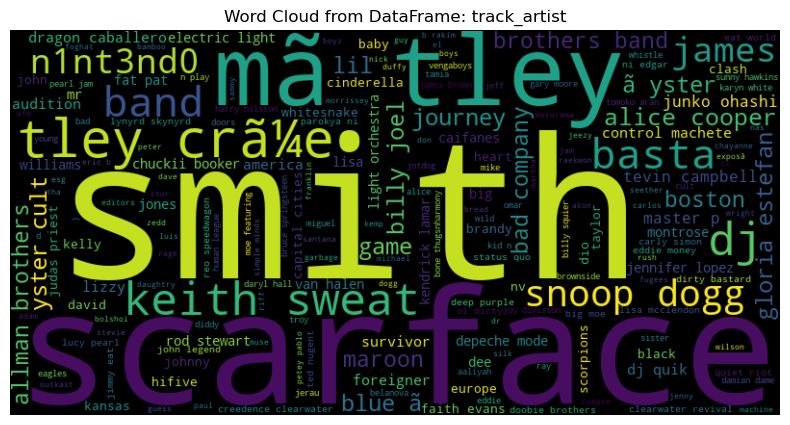

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the text data (track_artist column)
text = df['track_artist'].astype('string')

# Creating the word cloud to get the most common words
text_data = text.str.cat(sep=' ')  # Concatenate all artist names into a single string
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_data)

# Get the most common words
word_freq = wordcloud.process_text(text_data)
top_5_words = sorted(word_freq, key=word_freq.get, reverse=True)[:5]  # Changed to top 5 words

# Print top 5 words to verify
print("Top 5 common words in track_artist:", top_5_words)

# Function to check if any of the top 5 words appear in the artist's name
def contains_top_5_words(artist_name, top_words):
    # Convert the artist name to lowercase and check if any of the top 5 words exist
    artist_name = artist_name.lower()
    return any(word.lower() in artist_name for word in top_words)

# Create a new column "Top 5 words in artist" and apply the function
df['Top 5 words in artist'] = df['track_artist'].apply(lambda x: 1 if contains_top_5_words(x, top_5_words) else 0)

# Print the first few rows to confirm the new column has been added
print(df[['track_artist', 'Top 5 words in artist']].head())

# Plot the word cloud for track_artist
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from DataFrame: track_artist")
plt.show()


In [139]:
df.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,danceability,energy,key,loudness,mode,...,genre_edm,genre_rap,genre_pop,genre_r&b,genre_latin,genre_rock,release_date_category,top_50_words_in_song,top_5_words_in_song,Top 5 words in artist
12529,00qoe7ojrl0bpyiciwezb2,foreigner,67,2pw51hagvwpta3ayl2wvuu,37i9dqzf1dxdoeft9zx0dh,0.357,0.653,9,-5.554,1,...,0,0,0,0,0,1,1960-1993,0,0,0
20572,01qhvhvkgqzo861kl3ghfx,trinere,27,5bc8h7zzduifrb8pjj4utm,1oreeujywpqv2ox68bvppa,0.720,0.814,8,-8.195,0,...,0,0,0,0,1,0,1994-2007,0,0,0
24300,01gsilj7mznurr7gwajrgt,shinehead,32,3pcdxm6bp0nrofqdykznwp,0dminkymnnotwvefamsnzb,0.819,0.497,0,-15.495,0,...,0,0,0,1,0,0,1960-1993,1,1,0
14108,01q4ccxbvplcwz1fpifaem,smiths,56,7jfexk2w5adi25njkn0ugg,7rpsfdtqizyit4pvzq4c0c,0.680,0.626,7,-8.519,1,...,0,0,0,0,0,1,1960-1993,1,1,1
6865,02gwpancasvl82yc7y2hmn,petey pablo,54,5hrshdifyk7qxstjkb0sjz,4lcywqdozpfcbzrcbi3fow,0.735,0.844,1,-5.215,1,...,0,1,0,0,0,0,1994-2007,0,0,0


In [140]:
df.head()

,track_id,track_artist,track_popularity,track_album_id,playlist_id,danceability,energy,key,loudness,mode,...,genre_edm,genre_rap,genre_pop,genre_r&b,genre_latin,genre_rock,release_date_category,top_50_words_in_song,top_5_words_in_song,Top 5 words in artist
12529,00qoe7ojrl0bpyiciwezb2,foreigner,67,2pw51hagvwpta3ayl2wvuu,37i9dqzf1dxdoeft9zx0dh,0.357,0.653,9,-5.554,1,...,0,0,0,0,0,1,1960-1993,0,0,0
20572,01qhvhvkgqzo861kl3ghfx,trinere,27,5bc8h7zzduifrb8pjj4utm,1oreeujywpqv2ox68bvppa,0.720,0.814,8,-8.195,0,...,0,0,0,0,1,0,1994-2007,0,0,0
24300,01gsilj7mznurr7gwajrgt,shinehead,32,3pcdxm6bp0nrofqdykznwp,0dminkymnnotwvefamsnzb,0.819,0.497,0,-15.495,0,...,0,0,0,1,0,0,1960-1993,1,1,0
14108,01q4ccxbvplcwz1fpifaem,smiths,56,7jfexk2w5adi25njkn0ugg,7rpsfdtqizyit4pvzq4c0c,0.680,0.626,7,-8.519,1,...,0,0,0,0,0,1,1960-1993,1,1,1
6865,02gwpancasvl82yc7y2hmn,petey pablo,54,5hrshdifyk7qxstjkb0sjz,4lcywqdozpfcbzrcbi3fow,0.735,0.844,1,-5.215,1,...,0,1,0,0,0,0,1994-2007,0,0,0


In [141]:
#from sklearn.preprocessing import LabelEncoder
#import seaborn as sns
# Example: Convert a categorical column to numeric
#le = LabelEncoder()
#df['playlist_genre_encoded'] = le.fit_transform(df['playlist_genre'])

# Now, you can include this encoded column in the numeric_df if needed
#numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation
#corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.show()


In [142]:
from sklearn.linear_model import Lasso
import pandas as pd

# Define the features (excluding 'year_track_album_release_date' and 'count_playlist_genre')
X = df[['danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'month_track_album_release_date']]  # Feature matrix (without 'year_track_album_release_date' and 'count_playlist_genre')

# Define the target
y = df['track_popularity']  # Target vector

# Fit the Lasso model
model = Lasso(alpha=0.01)
model.fit(X, y)

# Create a DataFrame to display the feature coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Print feature coefficients
print(feature_coefficients)


                           Feature  Coefficient
4                             mode     2.316161
6                     acousticness     1.787389
3                         loudness     0.244348
2                              key     0.086133
10                           tempo     0.000839
12  month_track_album_release_date     0.000000
11                     duration_ms    -0.000032
9                          valence    -0.418403
0                     danceability    -1.637891
7                 instrumentalness    -2.825328
8                         liveness    -4.275571
1                           energy   -10.980360
5                      speechiness   -22.942491


In [143]:
from sklearn.linear_model import Lasso
import pandas as pd

# Define the features, excluding 'year_track_album_release_date' and 'count_playlist_genre'
X = df[['danceability',
        'energy',
        'key',
        'loudness',
        'mode',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo',
        'duration_ms',
        'month_track_album_release_date']]  # Feature matrix excluding the unwanted columns

# Define the target
y = df['track_popularity']  # Target vector

# Fit the Lasso model
model = Lasso(alpha=0.01)
model.fit(X, y)

# Create a DataFrame to display the feature coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Print feature coefficients
print(feature_coefficients)


                           Feature  Coefficient
4                             mode     2.316161
6                     acousticness     1.787389
3                         loudness     0.244348
2                              key     0.086133
10                           tempo     0.000839
12  month_track_album_release_date     0.000000
11                     duration_ms    -0.000032
9                          valence    -0.418403
0                     danceability    -1.637891
7                 instrumentalness    -2.825328
8                         liveness    -4.275571
1                           energy   -10.980360
5                      speechiness   -22.942491


In [144]:
#Based on the results of the feature importance, the features that have high absolute values for the coefficient (i.e., their impact on the model is more significant) should generally be kept, while features with very low or near-zero values could potentially be dropped.

#Here’s an analysis of the importance:

#High Positive Coefficients:
#danceability (5.15): This feature has a very high positive coefficient, indicating it has a significant influence on the model.
#mode (1.56): This feature also has a positive coefficient and is relatively important.
#acousticness (1.40): Another feature with a decent positive impact.

#Low Coefficients (or Near Zero):
#month_track_album_release_date (0.00): Coefficients near zero generally indicate the feature doesn't contribute much to the model's predictions, so you might consider dropping it.
#count_playlist_genre (0.00): Similar to the previous one, a coefficient close to zero suggests minimal impact.
#duration_ms (-0.00): Again, a coefficient close to zero suggests little to no impact.

#year_track_album_release_date (-0.43): While it has a negative coefficient, it doesn't seem to have a strong influence on the model.

#Negative Coefficients:
#instrumentalness (-0.51): While negative, it still has a significant absolute value.
#liveness (-4.12): This has a large negative value, which means it's influential in the model.
#valence (-5.59): This also has a significant negative value, indicating strong influence.
#energy (-13.79): One of the most important features, with a very large negative impact.
#speechiness (-14.72): Similar to energy, this has a very large negative coefficient, suggesting a strong influence on the model.

#Conclusion:
#I should definitely keep the features with high absolute coefficients (both positive and negative), as they have significant impact on the model. Based on this, the features you should consider keeping include:

#danceability (5.15)
#mode (1.56)
#acousticness (1.40)
#energy (-13.79)
#speechiness (-14.72)
#instrumentalness (-0.51)
#liveness (-4.12)
#valence (-5.59)

#Features to Consider Dropping (with low or near-zero coefficients):
#month_track_album_release_date (0.00)
#count_playlist_genre (0.00)
#duration_ms (-0.00)
#year_track_album_release_date (-0.43)#

In [145]:
# Drop the specified features from the DataFrame
df2 = df.drop(columns=['month_track_album_release_date', 'duration_ms'])

# Display the updated DataFrame with the dropped features
df2

,track_id,track_artist,track_popularity,track_album_id,playlist_id,danceability,energy,key,loudness,mode,...,genre_edm,genre_rap,genre_pop,genre_r&b,genre_latin,genre_rock,release_date_category,top_50_words_in_song,top_5_words_in_song,Top 5 words in artist
12529,00qoe7ojrl0bpyiciwezb2,foreigner,67,2pw51hagvwpta3ayl2wvuu,37i9dqzf1dxdoeft9zx0dh,0.357,0.653,9,-5.554,1,...,0,0,0,0,0,1,1960-1993,0,0,0
20572,01qhvhvkgqzo861kl3ghfx,trinere,27,5bc8h7zzduifrb8pjj4utm,1oreeujywpqv2ox68bvppa,0.720,0.814,8,-8.195,0,...,0,0,0,0,1,0,1994-2007,0,0,0
24300,01gsilj7mznurr7gwajrgt,shinehead,32,3pcdxm6bp0nrofqdykznwp,0dminkymnnotwvefamsnzb,0.819,0.497,0,-15.495,0,...,0,0,0,1,0,0,1960-1993,1,1,0
14108,01q4ccxbvplcwz1fpifaem,smiths,56,7jfexk2w5adi25njkn0ugg,7rpsfdtqizyit4pvzq4c0c,0.680,0.626,7,-8.519,1,...,0,0,0,0,0,1,1960-1993,1,1,1
6865,02gwpancasvl82yc7y2hmn,petey pablo,54,5hrshdifyk7qxstjkb0sjz,4lcywqdozpfcbzrcbi3fow,0.735,0.844,1,-5.215,1,...,0,1,0,0,0,0,1994-2007,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,7zhrclhhkdkvdswr0ckdlb,fun,42,6csgmett9h9nzcqsmd4dfq,1ygwqas1s77nzieih4arkn,0.646,0.787,0,-4.654,1,...,0,0,1,0,0,0,2008-2025,1,0,0
8332,7zkzwfo5j4ka2vbpqhfqwp,fat pat,0,2rzvfboumxkvqsr0wdhmgr,1qj66s6ybzgxmuavuyrhbo,0.735,0.652,0,-5.257,1,...,0,1,0,0,0,0,1994-2007,1,0,0
14082,7zsai7ae6dpvepn8mkskvz,flock seagulls,50,48ajnqhmdkrgvwjo0ugmiv,7rpsfdtqizyit4pvzq4c0c,0.447,0.744,2,-4.613,1,...,0,0,0,0,0,1,1960-1993,1,1,0
11615,7zsddsilks515d0tzgm64x,peter cetera,57,1o2sedklsshroeyyguqmnb,0xoik4m26aeysd61e5nsvw,0.656,0.347,9,-13.398,1,...,0,0,0,0,0,1,1960-1993,1,0,0


In [146]:
df1

,track_name,track_album_name,playlist_name,playlist_subgenre
12529,juke box hero,4 expanded,classic rock drive,classic rock
20572,ill youll need,night,80s freestyledisco dance party set crossfade 4...,latin hip hop
24300,try love,sidewalk university,90s new jack swing,new jack swing
14108,girlfriend coma 2011 remaster,strangeways come,permanent wave,permanent wave
6865,raise,diary sinner 1st entry,southern hip hop,southern hip hop
...,...,...,...,...
1699,pretty girls,aim ignite,pop punk posthardcore,post-teen pop
8332,heart hustler,greatest hits,3rd coast classics,southern hip hop
14082,space age love song,80s,permanent wave,permanent wave
11615,time fall amy grant,solitude solitaire,80s pop rock hits album tracks,album rock


In [147]:
# Add the specified columns to the existing df1 from the original df
df1['track_album_id'] = df2['track_album_id']
df1['playlist_id'] = df2['playlist_id']

# Remove the columns that were moved (from df1)
df2 = df2.drop(columns=['track_album_id','playlist_id'])

In [148]:
df2

,track_id,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,genre_edm,genre_rap,genre_pop,genre_r&b,genre_latin,genre_rock,release_date_category,top_50_words_in_song,top_5_words_in_song,Top 5 words in artist
12529,00qoe7ojrl0bpyiciwezb2,foreigner,67,0.357,0.653,9,-5.554,1,0.0654,0.082800,...,0,0,0,0,0,1,1960-1993,0,0,0
20572,01qhvhvkgqzo861kl3ghfx,trinere,27,0.720,0.814,8,-8.195,0,0.0546,0.007940,...,0,0,0,0,1,0,1994-2007,0,0,0
24300,01gsilj7mznurr7gwajrgt,shinehead,32,0.819,0.497,0,-15.495,0,0.1130,0.194000,...,0,0,0,1,0,0,1960-1993,1,1,0
14108,01q4ccxbvplcwz1fpifaem,smiths,56,0.680,0.626,7,-8.519,1,0.0255,0.126000,...,0,0,0,0,0,1,1960-1993,1,1,1
6865,02gwpancasvl82yc7y2hmn,petey pablo,54,0.735,0.844,1,-5.215,1,0.1670,0.142000,...,0,1,0,0,0,0,1994-2007,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,7zhrclhhkdkvdswr0ckdlb,fun,42,0.646,0.787,0,-4.654,1,0.0602,0.258000,...,0,0,1,0,0,0,2008-2025,1,0,0
8332,7zkzwfo5j4ka2vbpqhfqwp,fat pat,0,0.735,0.652,0,-5.257,1,0.2740,0.026600,...,0,1,0,0,0,0,1994-2007,1,0,0
14082,7zsai7ae6dpvepn8mkskvz,flock seagulls,50,0.447,0.744,2,-4.613,1,0.0311,0.000036,...,0,0,0,0,0,1,1960-1993,1,1,0
11615,7zsddsilks515d0tzgm64x,peter cetera,57,0.656,0.347,9,-13.398,1,0.0280,0.488000,...,0,0,0,0,0,1,1960-1993,1,0,0


In [149]:
#artist_type

In [150]:
import pandas as pd
import re
import nltk
from nltk.corpus import names

# Download names data from nltk
nltk.download('names')

# Load male and female names
male_names = set(names.words('male.txt'))
female_names = set(names.words('female.txt'))

# List of band-related keywords
band_keywords = ["band", "orchestra", "quartet", "group", "ensemble", "choir", "collective", "crew", "the"]

# Function to classify the artist type
def classify_artist(artist_name):
    artist_name_lower = artist_name.lower()  # Convert artist name to lowercase

    # Check if the artist is a band based on keywords or "&" or "and" in the name
    if any(keyword in artist_name_lower for keyword in band_keywords) or "&" in artist_name or " and " in artist_name_lower:
        return "Band"
    
    # Handle edge case: if artist name is empty or consists of just one word
    if len(artist_name.split()) == 0:
        return "Unknown"  # This case can be customized based on your needs
    
    # Check the first name to classify as male or female
    first_name = artist_name.split()[0].capitalize()  # Get the first name and capitalize it
    if first_name in female_names:
        return "Female"
    if first_name in male_names:
        return "Male"
    
    # Default return value if no match found
    return "Male"

# Assuming df2 is your DataFrame that already contains 'track_artist' column
# Apply the classify_artist function to the 'track_artist' column to create a new 'track_artist_type' column
df2['track_artist_type'] = df2['track_artist'].apply(classify_artist)

# Create dummy columns for male_artist, female_artist, and band_artist based on the 'track_artist_type'
df2['male_artist'] = df2['track_artist_type'].apply(lambda x: 1 if x == "Male" else 0)
df2['female_artist'] = df2['track_artist_type'].apply(lambda x: 1 if x == "Female" else 0)
df2['band_artist'] = df2['track_artist_type'].apply(lambda x: 1 if x == "Band" else 0)

# Drop the 'track_artist_type' column if you no longer need it
df2.drop(columns=['track_artist_type'], inplace=True)

# Print the resulting DataFrame
print(df2)




                     track_id      track_artist  track_popularity  \
12529  00qoe7ojrl0bpyiciwezb2         foreigner                67   
20572  01qhvhvkgqzo861kl3ghfx           trinere                27   
24300  01gsilj7mznurr7gwajrgt         shinehead                32   
14108  01q4ccxbvplcwz1fpifaem            smiths                56   
6865   02gwpancasvl82yc7y2hmn       petey pablo                54   
...                       ...               ...               ...   
1699   7zhrclhhkdkvdswr0ckdlb               fun                42   
8332   7zkzwfo5j4ka2vbpqhfqwp           fat pat                 0   
14082  7zsai7ae6dpvepn8mkskvz    flock seagulls                50   
11615  7zsddsilks515d0tzgm64x      peter cetera                57   
18035  7zsnap0yvzq3aeioafyqj6  dragon caballero                53   

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
12529         0.357   0.653    9    -5.554     1       0.0654      0.082800   
20572        

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\info\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [151]:
# Remove 'track_artist' from df and add it to df1
df1['track_artist'] = df['track_artist']

# Now remove the 'track_artist' column from df
df = df.drop(columns=['track_artist'])

# Print to confirm the changes
print("Updated df:")
print(df.head())

print("Updated df1:")
print(df1.head())


Updated df:
                     track_id  track_popularity          track_album_id  \
12529  00qoe7ojrl0bpyiciwezb2                67  2pw51hagvwpta3ayl2wvuu   
20572  01qhvhvkgqzo861kl3ghfx                27  5bc8h7zzduifrb8pjj4utm   
24300  01gsilj7mznurr7gwajrgt                32  3pcdxm6bp0nrofqdykznwp   
14108  01q4ccxbvplcwz1fpifaem                56  7jfexk2w5adi25njkn0ugg   
6865   02gwpancasvl82yc7y2hmn                54  5hrshdifyk7qxstjkb0sjz   

                  playlist_id  danceability  energy  key  loudness  mode  \
12529  37i9dqzf1dxdoeft9zx0dh         0.357   0.653    9    -5.554     1   
20572  1oreeujywpqv2ox68bvppa         0.720   0.814    8    -8.195     0   
24300  0dminkymnnotwvefamsnzb         0.819   0.497    0   -15.495     0   
14108  7rpsfdtqizyit4pvzq4c0c         0.680   0.626    7    -8.519     1   
6865   4lcywqdozpfcbzrcbi3fow         0.735   0.844    1    -5.215     1   

       speechiness  ...  genre_edm  genre_rap  genre_pop  genre_r&b  \
12529    

In [152]:
# Add the new columns by multiplying the respective columns
df['track_popularity * danceability'] = df['track_popularity'] * df['danceability']
df['track_popularity * genre_rock'] = df['track_popularity'] * df['genre_rock']

In [153]:
df.head()

,track_id,track_popularity,track_album_id,playlist_id,danceability,energy,key,loudness,mode,speechiness,...,genre_pop,genre_r&b,genre_latin,genre_rock,release_date_category,top_50_words_in_song,top_5_words_in_song,Top 5 words in artist,track_popularity * danceability,track_popularity * genre_rock
12529,00qoe7ojrl0bpyiciwezb2,67,2pw51hagvwpta3ayl2wvuu,37i9dqzf1dxdoeft9zx0dh,0.357,0.653,9,-5.554,1,0.0654,...,0,0,0,1,1960-1993,0,0,0,23.919,67
20572,01qhvhvkgqzo861kl3ghfx,27,5bc8h7zzduifrb8pjj4utm,1oreeujywpqv2ox68bvppa,0.720,0.814,8,-8.195,0,0.0546,...,0,0,1,0,1994-2007,0,0,0,19.440,0
24300,01gsilj7mznurr7gwajrgt,32,3pcdxm6bp0nrofqdykznwp,0dminkymnnotwvefamsnzb,0.819,0.497,0,-15.495,0,0.1130,...,0,1,0,0,1960-1993,1,1,0,26.208,0
14108,01q4ccxbvplcwz1fpifaem,56,7jfexk2w5adi25njkn0ugg,7rpsfdtqizyit4pvzq4c0c,0.680,0.626,7,-8.519,1,0.0255,...,0,0,0,1,1960-1993,1,1,1,38.080,56
6865,02gwpancasvl82yc7y2hmn,54,5hrshdifyk7qxstjkb0sjz,4lcywqdozpfcbzrcbi3fow,0.735,0.844,1,-5.215,1,0.1670,...,0,0,0,0,1994-2007,0,0,0,39.690,0


In [154]:
df2.head()

,track_id,track_artist,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,genre_r&b,genre_latin,genre_rock,release_date_category,top_50_words_in_song,top_5_words_in_song,Top 5 words in artist,male_artist,female_artist,band_artist
12529,00qoe7ojrl0bpyiciwezb2,foreigner,67,0.357,0.653,9,-5.554,1,0.0654,0.08280,...,0,0,1,1960-1993,0,0,0,1,0,0
20572,01qhvhvkgqzo861kl3ghfx,trinere,27,0.720,0.814,8,-8.195,0,0.0546,0.00794,...,0,1,0,1994-2007,0,0,0,1,0,0
24300,01gsilj7mznurr7gwajrgt,shinehead,32,0.819,0.497,0,-15.495,0,0.1130,0.19400,...,1,0,0,1960-1993,1,1,0,1,0,0
14108,01q4ccxbvplcwz1fpifaem,smiths,56,0.680,0.626,7,-8.519,1,0.0255,0.12600,...,0,0,1,1960-1993,1,1,1,1,0,0
6865,02gwpancasvl82yc7y2hmn,petey pablo,54,0.735,0.844,1,-5.215,1,0.1670,0.14200,...,0,0,0,1994-2007,0,0,0,1,0,0


In [155]:
# Ensure 'track_artist' is in df1 by copying it from df2, then remove it from df2
if 'track_artist' in df2.columns:
    df1['track_artist'] = df2['track_artist']
    df2.drop(columns=['track_artist'], inplace=True)

# Now, df1 will have 'track_artist' and df2 will no longer have it


In [156]:
df2

,track_id,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,genre_r&b,genre_latin,genre_rock,release_date_category,top_50_words_in_song,top_5_words_in_song,Top 5 words in artist,male_artist,female_artist,band_artist
12529,00qoe7ojrl0bpyiciwezb2,67,0.357,0.653,9,-5.554,1,0.0654,0.082800,0.000000,...,0,0,1,1960-1993,0,0,0,1,0,0
20572,01qhvhvkgqzo861kl3ghfx,27,0.720,0.814,8,-8.195,0,0.0546,0.007940,0.000290,...,0,1,0,1994-2007,0,0,0,1,0,0
24300,01gsilj7mznurr7gwajrgt,32,0.819,0.497,0,-15.495,0,0.1130,0.194000,0.000000,...,1,0,0,1960-1993,1,1,0,1,0,0
14108,01q4ccxbvplcwz1fpifaem,56,0.680,0.626,7,-8.519,1,0.0255,0.126000,0.000001,...,0,0,1,1960-1993,1,1,1,1,0,0
6865,02gwpancasvl82yc7y2hmn,54,0.735,0.844,1,-5.215,1,0.1670,0.142000,0.000000,...,0,0,0,1994-2007,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,7zhrclhhkdkvdswr0ckdlb,42,0.646,0.787,0,-4.654,1,0.0602,0.258000,0.000000,...,0,0,0,2008-2025,1,0,0,1,0,0
8332,7zkzwfo5j4ka2vbpqhfqwp,0,0.735,0.652,0,-5.257,1,0.2740,0.026600,0.000000,...,0,0,0,1994-2007,1,0,0,1,0,0
14082,7zsai7ae6dpvepn8mkskvz,50,0.447,0.744,2,-4.613,1,0.0311,0.000036,0.106000,...,0,0,1,1960-1993,1,1,0,1,0,0
11615,7zsddsilks515d0tzgm64x,57,0.656,0.347,9,-13.398,1,0.0280,0.488000,0.002210,...,0,0,1,1960-1993,1,0,0,1,0,0


In [157]:
df1.head()

,track_name,track_album_name,playlist_name,playlist_subgenre,track_album_id,playlist_id,track_artist
12529,juke box hero,4 expanded,classic rock drive,classic rock,2pw51hagvwpta3ayl2wvuu,37i9dqzf1dxdoeft9zx0dh,foreigner
20572,ill youll need,night,80s freestyledisco dance party set crossfade 4...,latin hip hop,5bc8h7zzduifrb8pjj4utm,1oreeujywpqv2ox68bvppa,trinere
24300,try love,sidewalk university,90s new jack swing,new jack swing,3pcdxm6bp0nrofqdykznwp,0dminkymnnotwvefamsnzb,shinehead
14108,girlfriend coma 2011 remaster,strangeways come,permanent wave,permanent wave,7jfexk2w5adi25njkn0ugg,7rpsfdtqizyit4pvzq4c0c,smiths
6865,raise,diary sinner 1st entry,southern hip hop,southern hip hop,5hrshdifyk7qxstjkb0sjz,4lcywqdozpfcbzrcbi3fow,petey pablo


In [158]:
# Save each DataFrame to its own pickle file
df.to_pickle('spotify_df_after_data_eng_df.pkl')
df1.to_pickle('spotify_df1_after_data_eng_df1.pkl')
df2.to_pickle('spotify_df2_after_data_eng_df2.pkl')

# Save each DataFrame to its own CSV file
df.to_csv('spotify_df_after_eng_df.csv', index=False)
df1.to_csv('spotify_df_after_eng_df1.csv', index=False)
df2.to_csv('spotify_df_after_eng_df2.csv', index=False)

# Print confirmation message
print("Spotify dataset saved as pickle and CSV files for feature engineering.")

print("Spotify dataset saved as a pickle file-Feature Engineering.")

Spotify dataset saved as pickle and CSV files for feature engineering.
Spotify dataset saved as a pickle file-Feature Engineering.
